In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-exercise-csv/Countries-exercise.csv


# import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data

In [3]:
data = pd.read_csv('/kaggle/input/country-exercise-csv/Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [4]:
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [5]:
data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


# Plot the data

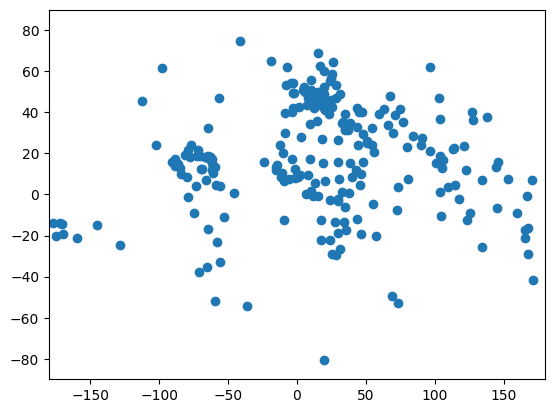

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Select the feature

In [7]:
x = data.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


# Clustering

In [8]:
kmeans = KMeans(7)

In [9]:
kmeans.fit(x)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

# Clustering Results

In [10]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 6, 3, 1, 0, 0, 0, 6, 1, 0, 4, 3, 2, 3, 1, 2, 0, 0, 3, 0, 5, 5,
       6, 0, 6, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 6, 3, 5, 0, 1, 6, 5, 5,
       3, 5, 4, 1, 3, 5, 1, 1, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 5, 1, 0, 3,
       0, 0, 3, 0, 2, 1, 0, 0, 2, 5, 0, 0, 0, 5, 5, 5, 5, 5, 0, 1, 0, 1,
       2, 1, 2, 3, 1, 0, 1, 0, 2, 0, 6, 2, 6, 0, 6, 0, 0, 0, 0, 1, 0, 0,
       2, 6, 6, 3, 6, 6, 1, 1, 2, 0, 6, 6, 0, 5, 0, 1, 0, 6, 3, 0, 0, 0,
       2, 1, 5, 0, 0, 3, 6, 1, 2, 0, 5, 0, 6, 0, 6, 2, 3, 5, 1, 3, 3, 2,
       3, 2, 5, 2, 5, 1, 4, 0, 0, 6, 2, 2, 6, 6, 1, 4, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 4, 6, 0, 6, 3, 5, 6, 3, 3, 5, 2, 1, 5, 2, 5, 1, 0, 3,
       3, 1, 0, 5, 1, 0, 0, 0, 3, 1, 3, 0, 1, 5, 5, 6, 6, 6, 2, 4, 1, 0,
       0, 2, 3, 3, 0, 1, 1, 6, 0, 1, 1, 1, 1, 6, 2, 4, 4, 3, 3, 3, 3],
      dtype=int32)

In [11]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,6
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


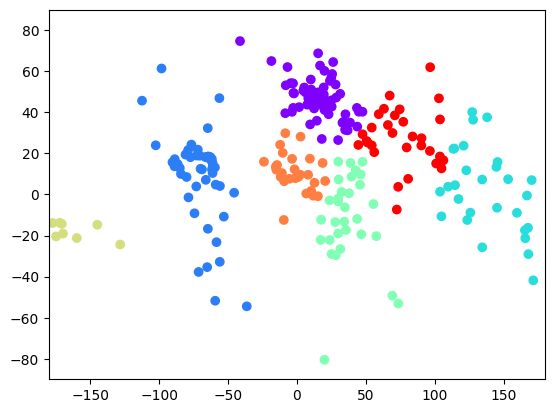

In [12]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()